In [1]:
from smach_utils2 import *

In [ ]:
tfBuffer = tf2.Buffer()

listener = tf2.TransformListener(tfBuffer)
b_tf=tf2.TransformBroadcaster()
b_st=tf2.StaticTransformBroadcaster()


In [ ]:
def write_tf(pose, q, child_frame , parent_frame='map',time=0):
    t= TransformStamped()
    t.header.stamp = rospy.Time.now()
    t.header.frame_id =parent_frame
    t.child_frame_id =  child_frame
    t.transform.translation.x = pose[0]
    t.transform.translation.y = pose[1]
    t.transform.translation.z = pose[2]
    #q = tf.transformations.quaternion_from_euler(eu[0], eu[1], eu[2])
    t.transform.rotation.x = q[0]
    t.transform.rotation.y = q[1]
    t.transform.rotation.z = q[2]
    t.transform.rotation.w = q[3]
    return t
def read_tf(t):
    pose=np.asarray((
        t.transform.translation.x,
        t.transform.translation.y,
        t.transform.translation.z
        ))
    quat=np.asarray((
        t.transform.rotation.x,
        t.transform.rotation.y,
        t.transform.rotation.z,
        t.transform.rotation.w
        ))
    
    return pose, quat


In [ ]:
res=segmentation_server.call()

In [ ]:
res

In [ ]:
poses=np.asarray(res.poses.data)

poses=poses.reshape((int(len(poses)/3) ,3     )      )

In [ ]:
head.set_named_target('neutral')

In [ ]:
#t=write_tf(res.poses.data,(0,0,0,1),'Target',"head_rgbd_sensor_depth_frame",0)
t=write_tf(poses[0,:],(0,0,0,1),'Target_tmp',"head_rgbd_sensor_depth_frame",0) ## CHOOSE A TARGET 

b_tf.sendTransform(t)
rospy.sleep(0.2)
tt=tfBuffer.lookup_transform('map','Target_tmp',rospy.Time(0))
rospy.sleep(0.2)
tt
pose,quat= read_tf(tt)
t=write_tf(pose,(0,0,0,1),'Target')
b_st.sendTransform(t)


In [ ]:
head = moveit_commander.MoveGroupCommander('head')
#gripper =  moveit_commander.MoveGroupCommander('gripper')
#arm=moveit_commander.MoveGroupCommander('arm')

In [ ]:
#whole_body=moveit_commander.MoveGroupCommander('whole_body')

In [ ]:
clear_octo_client()
arm_grasp_from_above = [0.3, -2.0, 0.0, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:
head.set_named_target('neutral')
head.go()
clear_octo_client()


In [ ]:
#
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]#
wb_gp.pose.position.z= pose[2]+0.3   ##Pre Grasp from above


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
if plan[0]:
    succ=whole_body.go()
else:
    print('No plan')

In [ ]:
succ

In [ ]:
t=tfBuffer.lookup_transform('hand_palm_link', 'Target',rospy.Time())

In [ ]:
pose,_=read_tf(t)
pose

In [ ]:
goal_p=whole_body.get_current_pose()
goal_p.pose.position.x=0.1
goal_p.pose.position.y=pose[1]
goal_p.pose.position.z=pose[2]+0.2
#goal_p.pose.orientation.w=quat[0]
#goal_p.pose.orientation.x=quat[1]
#goal_p.pose.orientation.y=quat[2]
#goal_p.pose.orientation.z=quat[3]



In [ ]:
whole_body.set_pose_target(goal_p)

In [ ]:
whole_body.plan()

In [ ]:
goal_p=whole_body.get_current_pose()

In [ ]:
whole_body.set_pose_target(goal_p)
whole_body.plan()

In [ ]:
whole_body.go()

In [ ]:
res.poses.data

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time())

In [ ]:
pose,quat=read_tf(t)

In [ ]:
goal_pose= Pose()

In [ ]:
goal_pose.position.x=pose[0]
goal_pose.position.y=pose[1]
goal_pose.position.z=pose[2]

In [ ]:
pose,goal_pose

In [ ]:
whole_body.get_current_pose()

In [ ]:
wb=whole_body.get_current_joint_values()

In [ ]:
wb[4]=0.1

In [ ]:
whole_body.go(wb)

In [ ]:
pose=whole_body.get_current_pose()

In [ ]:
type(pose.pose.orientation)

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
gp=whole_body.get_current_pose()

In [ ]:

gp.pose.orientation
pose=gp
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])

In [ ]:
eu=tf.transformations.euler_from_quaternion((pose.pose.orientation.w,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z))

In [ ]:
tfBuffer.lookup_transform('hand_palm_link','New:static_Target',rospy.Time(0))

In [ ]:
#eu[1]=0
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)

In [ ]:
wb_gp=whole_body.get_current_pose()

In [ ]:
eu=tf.transformations.euler_from_quaternion((wb_gp.pose.orientation.w,wb_gp.pose.orientation.x,wb_gp.pose.orientation.y,wb_gp.pose.orientation.z))
quat=tf.transformations.quaternion_from_euler(eu[0],eu[1],eu[2])
rot_quat=tf.transformations.quaternion_from_euler(0,0.5*np.pi,0.0)
rotated=tf.transformations.quaternion_multiply(quat,rot_quat)



In [ ]:
wb_gp.pose.position.x-=0.1
wb_gp.pose.position.y+=0.1
wb_gp.pose.position.z-=0.1


In [ ]:
wb_gp.pose.orientation.w=rotated[0]
wb_gp.pose.orientation.x=rotated[1]
wb_gp.pose.orientation.y=rotated[2]
wb_gp.pose.orientation.z=rotated[3]

In [ ]:
whole_body.set_pose_target(wb_gp)

In [ ]:

plan=whole_body.plan()
plan

In [ ]:
if plan[0]:
    whole_body.go()

In [ ]:
whole_body.go()

In [ ]:
arm_grasp_from_above = [0.19263830140116414, -2.2668981568652917, -0.007358947463759424, -0.9939144210462025, -0.17365421548386273, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)

In [ ]:

t=tfBuffer.lookup_transform('New:static_Target','hand_palm_link',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat
np.save('above_quat.npy',quat)

In [ ]:
t=tfBuffer.lookup_transform('map','Target',rospy.Time(0))
pose , quat =  read_tf(t)
pose,quat

In [ ]:
wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2


In [ ]:
whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()
plan

In [ ]:

whole_body.go()

In [ ]:
wb_v=whole_body.get_current_joint_values()


In [ ]:
gripper = GRIPPER()

In [ ]:
gripper.close()

In [ ]:
gripper =  moveit_commander.MoveGroupCommander('gripper')

In [ ]:

|
tf_man.pub_static_tf()

In [ ]:
head.set_joint_values([0.0, -0.77])


In [ ]:
print ('rdy')

In [ ]:
brazo.set_named_target('go')
head.set_joint_values([0.0, -0.77])
res=segmentation_server.call()
if len(res.poses.data)==0: print( 'failed')
else:

    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  





    tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
    rospy.sleep(0.3)
    tf_man.change_ref_frame_tf(point_name='target', new_frame='map')
    rospy.sleep(0.3)
    pose, _ =tf_man.getTF('target')
    tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


    head.set_named_target('neutral')

In [ ]:
poses=np.asarray(res.poses.data)
poses=poses.reshape((int(len(poses)/3) ,3     )      )  





tf_man.pub_static_tf(pos=poses[0,:], point_name='target', ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO

In [ ]:
tf_man.change_ref_frame_tf(point_name='target', new_frame='map')


In [ ]:
pose, _ =tf_man.getTF('target')
tf_man.pub_static_tf(pos=pose, point_name='Target')## which object to choose   #TODO


In [ ]:
head.set_named_target('neutral')

In [ ]:
 clear_octo_client()
#############################10 * 2 *np.pi / 360 ####pi /2
arm_grasp_from_above = [0.2, -1.57, -0.13 , -1.57, 0.0, 0.0]
wb_v=whole_body.get_current_joint_values()
wb_v[3:]=arm_grasp_from_above
succ = whole_body.go(wb_v)   

In [ ]:
clear_octo_client()
pose, quat=tf_man.getTF('Target')

wb_gp=whole_body.get_current_pose()
wb_gp.pose.position.x= pose[0]
wb_gp.pose.position.y= pose[1]
wb_gp.pose.position.z= pose[2]+0.2

whole_body.set_pose_target(wb_gp)
plan=whole_body.plan()

In [ ]:
pos,rot=tf_man.getTF(target_frame=,ref)
pos

In [ ]:
from smach_utils2 import *

In [ ]:
from smach_utils2 import *


In [ ]:
wb_gp=whole_body.get_current_pose()            
wb_gp.header.frame_id="Target"
wb_gp.pose.position.x=0.02669
wb_gp.pose.position.y=0.045
wb_gp.pose.position.z= 0.033
wb_gp.pose.orientation.w=-0.990
wb_gp.pose.orientation.x= 0.0246
wb_gp.pose.orientation.y= -0.0085
wb_gp.pose.orientation.z= 0.1345



In [ ]:
aaa

In [ ]:
from smach_ros import ActionServerWrapper

In [ ]:
res = speech_recog_server()

In [ ]:
res.data

#msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg

In [ ]:
if len(res.data.split(' '))>1:print(res.data.split(' ')[-1])    ### Number of words


In [ ]:
from ros_whisper_vosk.srv import SetGrammarVosk
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar = rospy.ServiceProxy('set_grammar_vosk', SetGrammarVosk)

In [ ]:
set_grammar(['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi'])  ##PRESET NAMES

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
msg

In [ ]:
msg = rospy.wait_for_message('/speech_recognition/final_result', String, 10)
#msg.data
if len(msg.data.split(' '))>1:print(msg.data.split(' ')[-1]) 

In [ ]:

res=get_keywords_speech(10)
res

In [ ]:
drinks=['coke','juice','beer', 'water', 'soda', 'wine']
names=['pete','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi']
confirmation=['yes','no']
gram=drinks+names+confirmation

set_grammar(gram)  ##PRESET DRINKS


In [ ]:
res2 = get_keywords_speech(10)
if res2 in['yes','jack','juice']:print('chido',res2)
else: print ('chale',res2)

In [ ]:
set_grammar(['yes','no'])

In [ ]:
res2 in ['yes', 'no']

In [ ]:
res2='not'

In [32]:
import matplotlib.pyplot as plt

#map_msg= rospy.wait_for_message('/prohibition_layer_map', OccupancyGrid)
map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)
inflated_map= np.asarray(map_msg.data)

In [33]:
map_msg.info.width

512

In [44]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))



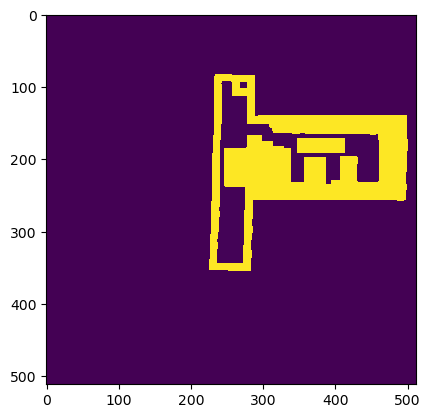

In [45]:
import matplotlib.pyplot as plt
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))


plt.imshow(img_map)

In [46]:
img_map[237,474]

100

In [ ]:
from smach_utils2 import *


In [47]:
brazo.set_named_target()
head.set_joint_values([0,-1])


In [58]:
res=segmentation_server.call()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

if len(res.poses.data)==0: print( 'failed')
else:
    print('object found')
    
    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  
    num_objs=len(poses)
    print (num_objs)
    for i,pose in enumerate(poses):
        #print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        point_name=f'object_{i}'
        tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
        rospy.sleep(0.3)
        tf_man.change_ref_frame_tf(point_name=point_name, new_frame='map')
        rospy.sleep(0.3)
        pose,_= tf_man.getTF(point_name)
        print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of arena, occupied inflated map')
            tf_man.pub_static_tf(pos=[0,0,0], point_name=point_name, ref='head_rgbd_sensor_rgb_frame')
            num_objs-=1
        print (f"object found at robot coords.{pose} ")

print(num_objs)

object found
1
Occupancy map at point object 0-> pixels  241 473 100
reject point, most likely part of arena, occupied inflated map
object found at robot coords.[10.845846994351607, -0.746051630408785, 0.06784710732571553] 
0
shutdown request: [/smach] Reason: new node registered with same name


In [53]:
contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),contoured)

In [49]:
pose

array([-0.48032123, -0.42369834,  1.43808556])

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]


In [ ]:
#FREE SPACE . SO IT IS A PLAUSIBLE HYPOTHESIS OF A TRASH OBJECT

In [ ]:
pose

In [1]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

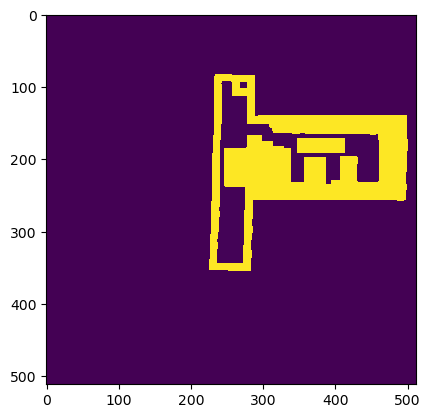

In [21]:

import matplotlib.pyplot as plt
plt.imshow(img_map)

In [41]:
origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) 

(247, 266)

In [31]:
img_map[200,474]

100

In [26]:
img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]


#img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m) ]

0

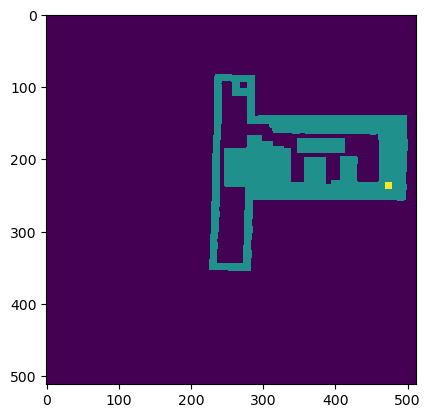

In [27]:
origin_map_img=[round(contoured.shape[0]*0.5) ,round(contoured.shape[1]*0.5)]
pose,_= tf_man.getTF('object_0')

contoured=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m),img_map)
plt.imshow(contoured)

In [ ]:
contoured[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]#### Yes axes seem to be "flipped"

In [ ]:

contoured[origin_map_img[1],origin_map_img[0]]

In [ ]:
robot=get_robot_px()
draw_at(origin_map_img[0]+robot[0]+round(pose[0]/pix_per_m) ,origin_map_img[1] -robot[1] - round(pose[1]/pix_per_m),contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')

In [ ]:
contoured[origin_map_img[1]- round(pose[1]/pix_per_m),origin_map_img[0]- round(pose[0]/pix_per_m)]

In [ ]:
contoured[0,0]

In [ ]:
contoured[origin_map_img[0]- round(pose[0]/pix_per_m),origin_map_img[1]- round(pose[1]/pix_per_m)]

In [ ]:
c=point_to_px(pose[0],pose[1])
robot=get_robot_px()
draw_at(1024+robot[1]+c[0],1024+robot[0]+c[1],contoured)
plt.imshow(contoured[750:1250,750:1250])
print ('robot Pose (tf)')


In [ ]:
contoured[c[0]+1024,c[1]+1024]

In [ ]:

check_point_map(pose[0],pose[1])

In [ ]:
pose

In [ ]:
pose